# <font color=blue> Testing out SVM code from recommended GitHub source

In [1]:
print(__doc__)

Automatically created module for IPython interactive environment


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import time
import datetime as dt

In [3]:
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
#fetch original mnist dataset
from sklearn.datasets import fetch_mldata

In [4]:
# import custom module
# Standard scientific Python imports
import matplotlib.pyplot as plt
import numpy as np
import time
import datetime as dt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
#fetch original mnist dataset
from sklearn.datasets import fetch_mldata

# import custom module
from mnist_helpers import *

In [5]:
mnist = fetch_mldata('MNIST original', data_home='./')
#minist object contains: data, COL_NAMES, DESCR, target fields
#you can check it by running
mnist.keys()

dict_keys(['DESCR', 'COL_NAMES', 'target', 'data'])

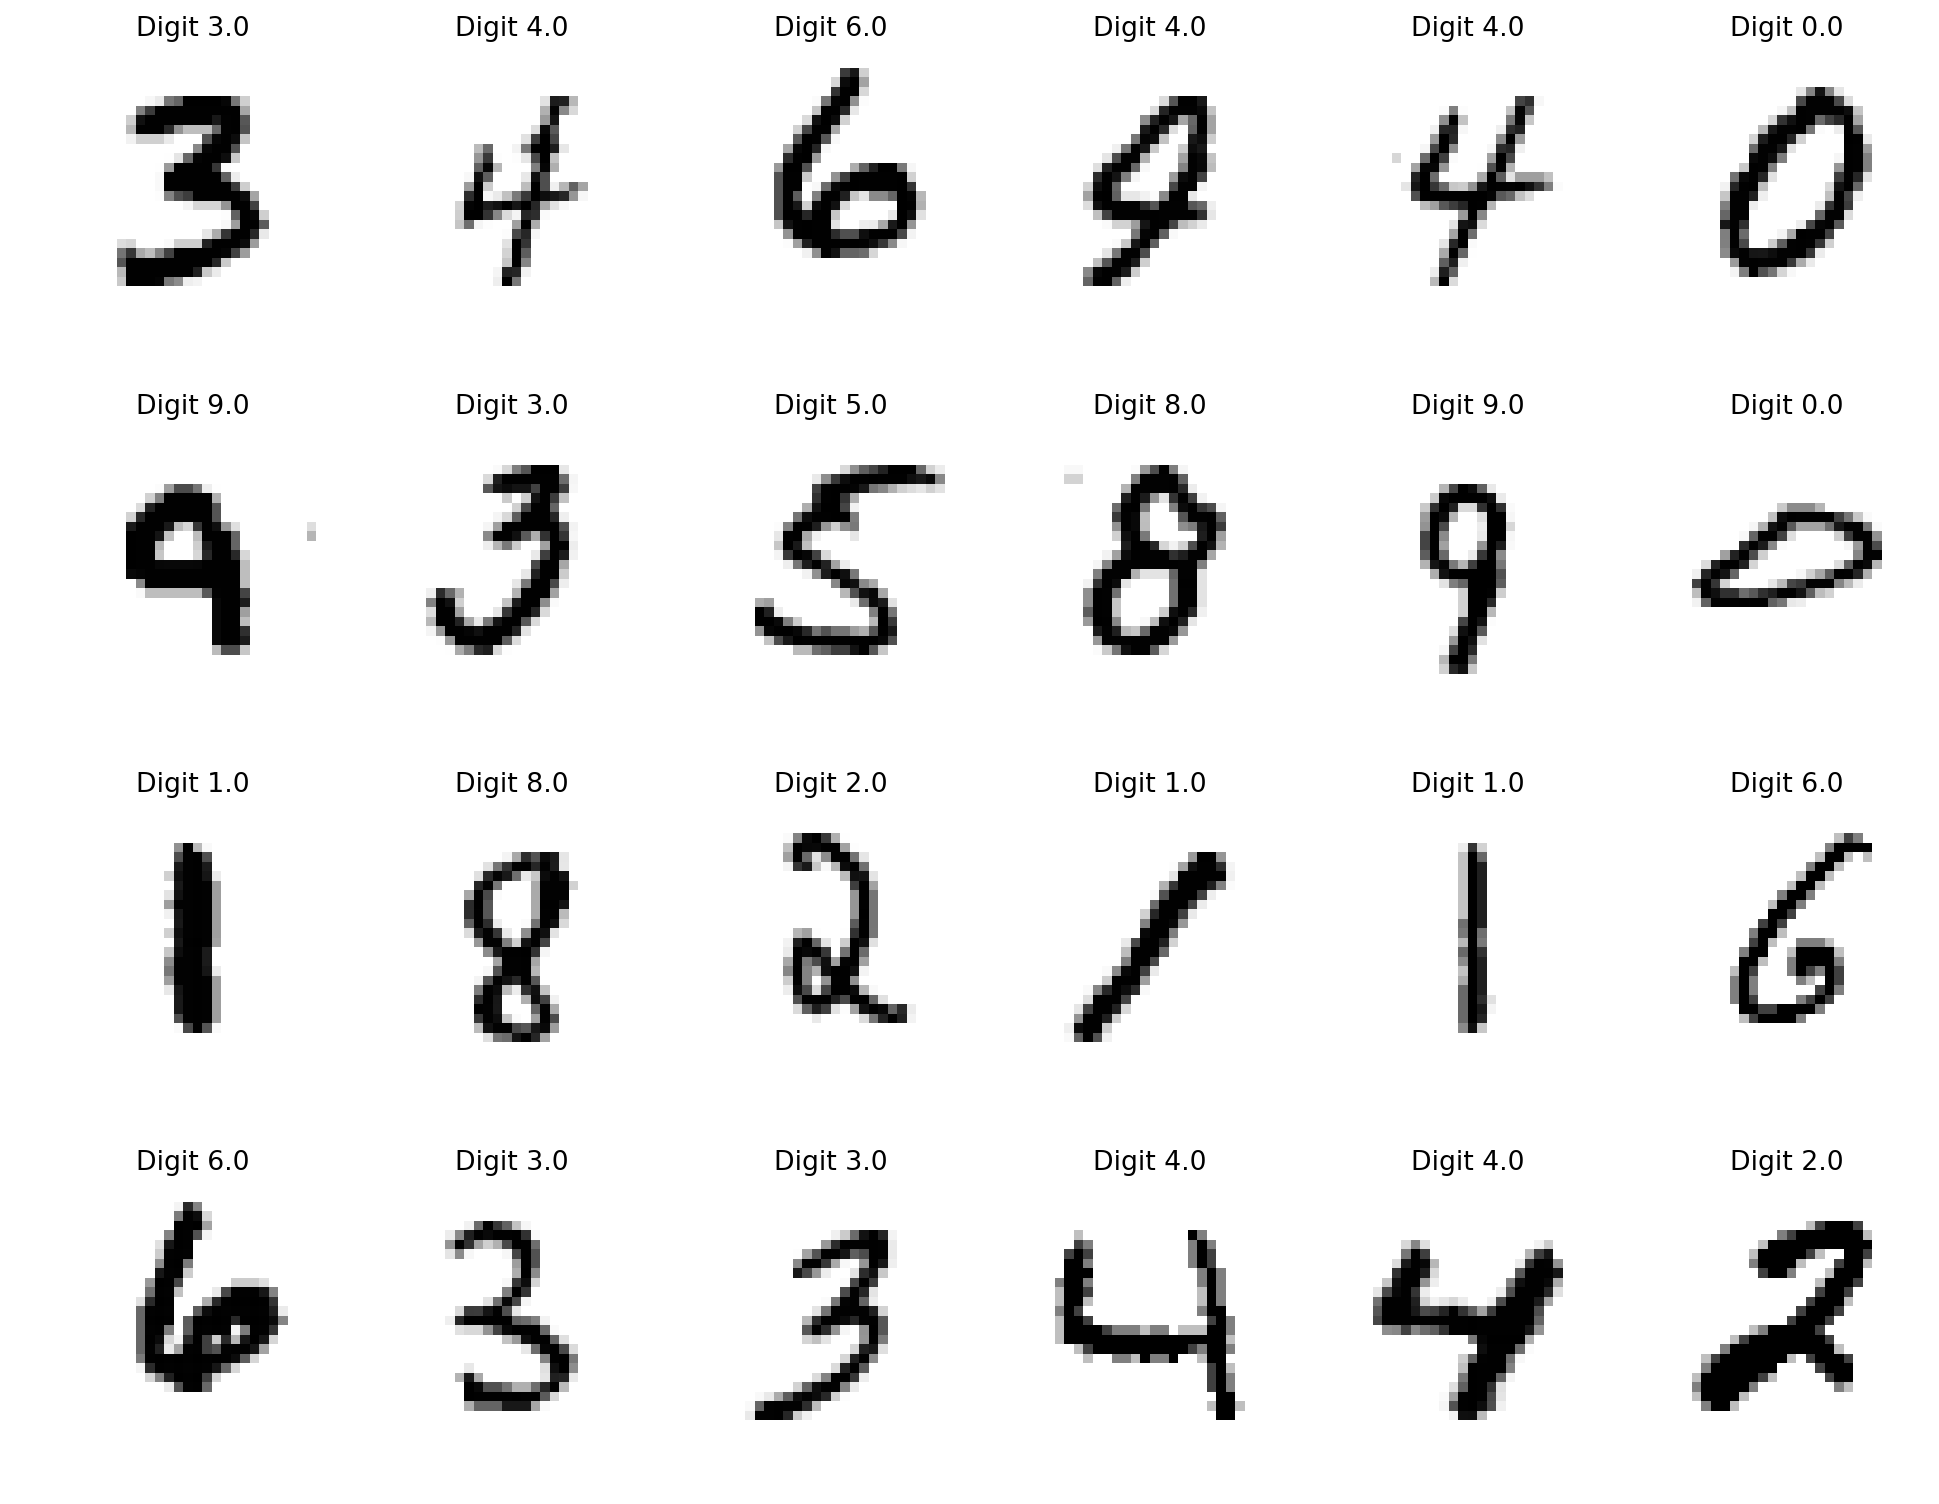

In [6]:
#data field is 70k x 784 array, each row represents pixels from 28x28=784 image
images = mnist.data
targets = mnist.target

# Let's have a look at the random 16 images, 
# We have to reshape each data row, from flat array of 784 int to 28x28 2D array

#pick  random indexes from 0 to size of our dataset
show_some_digits(images,targets)

In [7]:
#---------------- classification begins -----------------
#scale data for [0,255] -> [0,1]
#sample smaller size for testing
#rand_idx = np.random.choice(images.shape[0],10000)
#X_data =images[rand_idx]/255.0
#Y      = targets[rand_idx]

#full dataset classification
X_data = images/255.0
Y = targets

#split data to train and test
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, Y, test_size=0.15, random_state=42)

In [8]:
############### Classification with grid search ##############
# If you don't want to wait, comment this section and uncommnet section below with
# standalone SVM classifier

# Warning! It takes really long time to compute this about 2 days

# Create parameters grid for RBF kernel, we have to set C and gamma
from sklearn.model_selection import GridSearchCV

# generate matrix with all gammas
# [ [10^-4, 2*10^-4, 5*10^-4], 
#   [10^-3, 2*10^-3, 5*10^-3],
#   ......
#   [10^3, 2*10^3, 5*10^3] ]
#gamma_range = np.outer(np.logspace(-4, 3, 8),np.array([1,2, 5]))
gamma_range = np.outer(np.logspace(-3, 0, 4),np.array([1,5]))
gamma_range = gamma_range.flatten()

# generate matrix with all C
#C_range = np.outer(np.logspace(-3, 3, 7),np.array([1,2, 5]))
C_range = np.outer(np.logspace(-1, 1, 3),np.array([1,5]))
# flatten matrix, change to 1D numpy array
C_range = C_range.flatten()

parameters = {'kernel':['rbf'], 'C':C_range, 'gamma': gamma_range}

svm_clsf = svm.SVC()
grid_clsf = GridSearchCV(estimator=svm_clsf,param_grid=parameters,n_jobs=1, verbose=2)


start_time = dt.datetime.now()
print('Start param searching at {}'.format(str(start_time)))

Start param searching at 2018-03-21 23:44:18.287307


In [ ]:
grid_clsf.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................


In [ ]:
elapsed_time= dt.datetime.now() - start_time
print('Elapsed time, param searching {}'.format(str(elapsed_time)))

In [ ]:
sorted(grid_clsf.cv_results_.keys())

classifier = grid_clsf.best_estimator_
params = grid_clsf.best_params_

scores = grid_clsf.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(gamma_range))
plot_param_space_scores(scores, C_range, gamma_range)
######################### end grid section #############

In [ ]:
################ Classifier with good params ###########
# Create a classifier: a support vector classifier

# param_C = 5
# param_gamma = 0.05
#classifier = svm.SVC(C=param_C,gamma=param_gamma)

# We learn the digits on train part
# start_time = dt.datetime.now()
# print('Start learning at {}'.format(str(start_time)))
# classifier.fit(X_train, y_train)
# end_time = dt.datetime.now() 
# print('Stop learning {}'.format(str(end_time)))
# elapsed_time= end_time - start_time
# print('Elapsed learning {}'.format(str(elapsed_time)))


########################################################


# Now predict the value of the test
expected = y_test
predicted = classifier.predict(X_test)

show_some_digits(X_test,predicted,title_text="Predicted {}")

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))

In [ ]:
cm = metrics.confusion_matrix(expected, predicted)
print("Confusion matrix:\n%s" % cm)

plot_confusion_matrix(cm)

print("Accuracy={}".format(metrics.accuracy_score(expected, predicted)))